# Nonlinear Mapping

## Motivation: Can the function (x + 1)^2 be approximated throw a linear function?
* Yes, but only if wew map the feature x into a new space: x |-> phi(x) = (a, b) 

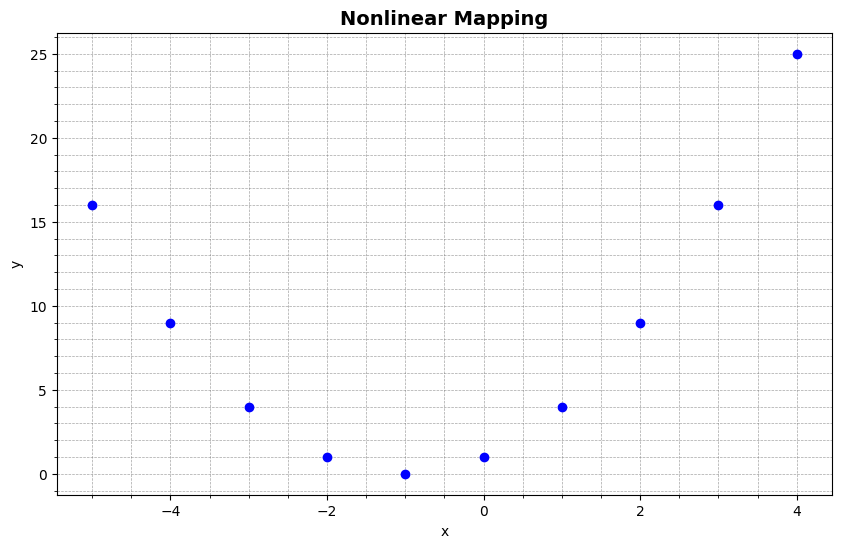

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Features
X = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4])

# Targets
y = np.array([16, 9, 4, 1, 0, 1, 4, 9, 16, 25])

plt.figure(figsize=(10, 6))
plt.title('Nonlinear Mapping', fontsize=14, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.minorticks_on()
plt.plot(X, y, 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [25]:
# Mapping function: x -> (x, x^2)
def phi(x: float) -> tuple[float, float]:
    return (x, x**2)

# For plotting the approximated function
def f_model(x: float, w: np.array) -> np.array:
    x_mapped = phi(x)
    x_hat = np.array([x, x_mapped[0], x_mapped[1]])
    return x_hat[0] * w[0] + x_hat[1] * w[1] + x_hat[2] * w[2]

# Adding bias
def add_bias(X: np.array) -> np.array:
    return np.array([np.append(1, x) for x in X])

In [26]:
def gradient_descent(X: np.array, y: np.array, eps: float, max_iter: int, verbose: bool=False) -> np.array:
    w = np.zeros(3)
    X_b = add_bias(X)
    for iter in range(max_iter):
        for i in range(len(X)): 
            # Mapping x to higher dimension. 
            x_mapped = phi(X_b[i][1])
            x = np.array([X_b[i][0], x_mapped[0], x_mapped[1]])       # (3,)
            
            # Actual forward pass 
            y_hat = np.dot(x, w)                                    # (3,) * (3,) = (1,)
            
            # Caclulating gradient
            J = -2 * (y[i] - y_hat) * x                             # (3,)
            
            # Updating weights 
            w = w - eps * J                                         # (3,)

        # Printing loss
        if verbose:
            if iter % 10 == 0:
                Y_hat = f_model(X, w)
                loss = np.mean((y - Y_hat)**2) 
                print(f"Iter: {iter}, Loss: {loss}")
    return w

In [27]:
w_star = gradient_descent(X, y, eps=0.0001, max_iter=100, verbose=True)

Iter: 0, Loss: 88.48133183118006
Iter: 10, Loss: 22.784808727447448
Iter: 20, Loss: 16.237949238591874
Iter: 30, Loss: 11.611425668990208
Iter: 40, Loss: 8.26196575053022
Iter: 50, Loss: 5.851046886124647
Iter: 60, Loss: 4.129734349267398
Iter: 70, Loss: 2.9140418003046675
Iter: 80, Loss: 2.0680068650048087
Iter: 90, Loss: 1.491263460973766


In [28]:
# Result weights
print(w_star)

[0.21369472 1.54898074 1.01038565]


In [29]:
def f_model(x: float, w: np.array) -> np.array:
    x_mapped = phi(x)
    x_hat = np.array([x, x_mapped[0], x_mapped[1]])
    return x_hat[0] * w[0] + x_hat[1] * w[1] + x_hat[2] * w[2]

In [30]:
X_continues = np.linspace(-5, 4, 1000)

ValueError: x and y must have same first dimension, but have shapes (10,) and (1000,)

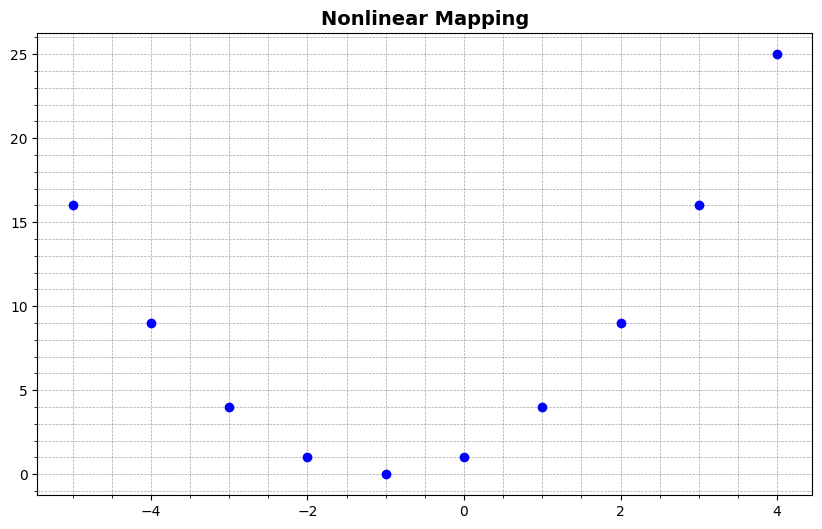

In [31]:
plt.figure(figsize=(10, 6))
plt.title('Nonlinear Mapping', fontsize=14, fontweight='bold')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
plt.minorticks_on()
plt.plot(X, y, 'bo')
plt.plot(X_continues, f_model(X_continues, w_star), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()